Data cleaned and saved.


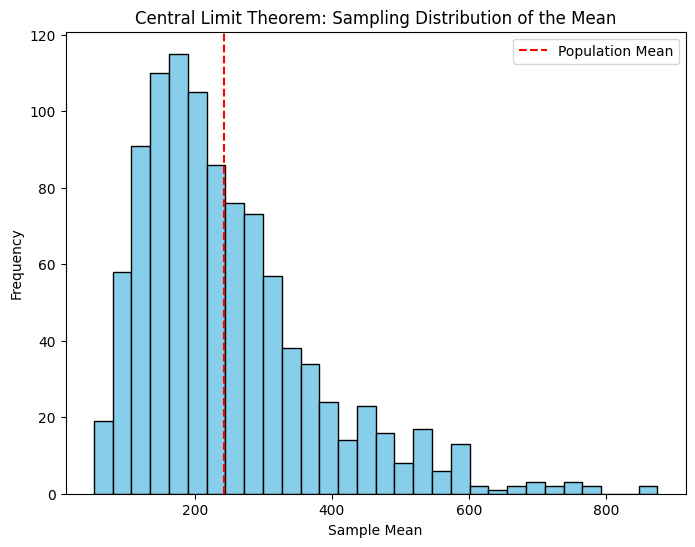

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load data
#df = pd.read_csv('suicides.csv')  # Replace with actual path to the suicides dataset
loan_df = pd.read_csv('train.csv')  # Replace with actual path to train.csv

# Data Cleaning for 'suicides_no' column (remove NaN or invalid values)
df = pd.read_csv('suicides.csv')
df.fillna(0, inplace=True)
df['suicides_no'] = pd.to_numeric(df['suicides_no'], errors='coerce')
df.drop_duplicates(inplace=True)
df.to_csv('suicides_cleaned.csv', index=False)
print("Data cleaned and saved.")

# Central Limit Theorem - Sampling distribution
population_mean = df['suicides_no'].mean()
sample_means = []
for _ in range(1000):
    sample = df['suicides_no'].sample(n=50, replace=True)
    sample_means.append(sample.mean())

plt.figure(figsize=(8,6))
plt.hist(sample_means, bins=30, color='skyblue', edgecolor='black')
plt.axvline(population_mean, color='red', linestyle='dashed', linewidth=1.5, label='Population Mean')
plt.title('Central Limit Theorem: Sampling Distribution of the Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

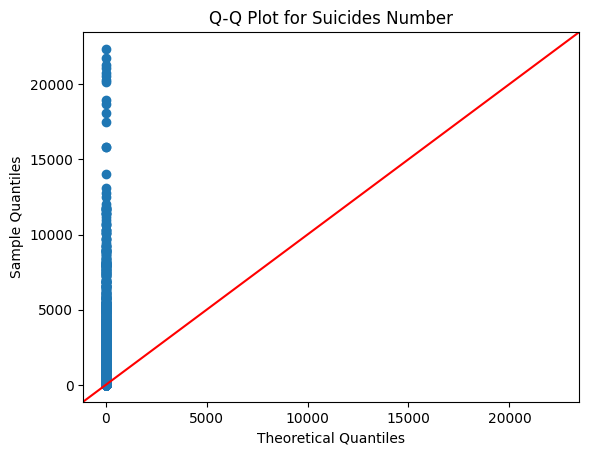

In [3]:
# QQ plot for df['suicides_no']
import statsmodels.api as sm
sm.qqplot(df['suicides_no'], line='45')
plt.title('Q-Q Plot for Suicides Number')
plt.show()

In [4]:
# Summary Statistics for 'suicides_no'
summary_stats = {
    'Mean': np.mean(df['suicides_no']),
    'Median': np.median(df['suicides_no']),
    'Variance': np.var(df['suicides_no']),
    'Standard Deviation': np.std(df['suicides_no']),
    'Skewness': stats.skew(df['suicides_no']),
    'Kurtosis': stats.kurtosis(df['suicides_no']),
}
print('Summary Statistics for Suicides_no:')
for stat, value in summary_stats.items():
    print(f'{stat}: {value}')

Summary Statistics for Suicides_no:
Mean: 242.57440690150972
Median: 25.0
Variance: 813661.1958654822
Standard Deviation: 902.0317044680205
Skewness: 10.352352118815231
Kurtosis: 157.14038007589465


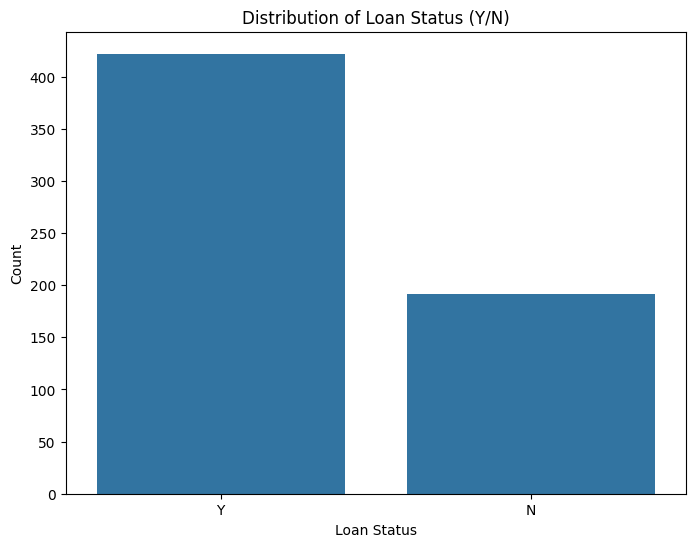

Number of applicants with Dependents >= 2: 152


In [5]:
# Loan Status Distribution (from train.csv)
loan_status_counts = loan_df['Loan_Status'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=loan_status_counts.index, y=loan_status_counts.values)
plt.title('Distribution of Loan Status (Y/N)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

# Applicants with Dependents >= 2
dependents_count = loan_df[loan_df['Dependents'] >= '2']['Dependents'].count()
print(f'Number of applicants with Dependents >= 2: {dependents_count}')
